In [152]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from colormap import Color
import datetime
import time
%matplotlib inline

#logging
import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logger.info('Test Debug')

In [2]:
# read cumtd files and make a panda dataframe from the files
# calendar_dates.txt
calendar_dates = pd.read_csv('cumtd/calendar_dates.txt')
# routes
routes = pd.read_csv('cumtd/routes.txt')
# shapes
shapes = pd.read_csv('cumtd/shapes.txt')
# stop_times
stop_times = pd.read_csv('cumtd/stop_times.txt')
# stops
stops = pd.read_csv('cumtd/stops.txt')
# trips
trips = pd.read_csv('cumtd/trips.txt')


In [3]:
calendar_dates

,service_id,date,exception_type
0,I4UISU,20170115,1
1,I4UISU,20170122,1
2,I4UISU,20170129,1
3,I4UISU,20170205,1
4,I4UISU,20170212,1
5,I4UISU,20170219,1
6,I4UISU,20170226,1
7,I4UISU,20170305,1
8,I4UISU,20170312,1
9,I4UISU,20170326,1


In [4]:
trips

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,TEAL,T4 UIMF,[@14.0.51708725@][4][1277756770140]/0__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,TEAL 26
1,TEAL,T4 UIMF,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,TEAL 23
2,TEAL,T4 UIMF,[@7.0.41893871@][3][1243541396687]/72__T4_UIMF,EAST - ORCHARD DOWNS,0,T4 UIMF,12E TEAL 13
3,TEAL,T4 UIMF,[@7.0.41893871@][4][1243540851671]/4__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,12W TEAL 12
4,TEAL,T4 UIMF,[@7.0.41893871@][3][1243541396687]/74__T4_UIMF,EAST - ORCHARD DOWNS,0,T4 UIMF,12E TEAL 13
5,TEAL,T4 UIMF,[@7.0.41893871@][4][1243540851671]/6__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,12W TEAL 12
6,TEAL,T4 UIMF,[@7.0.41893871@][3][1243541488843]/110__T4_UIMF,EAST - PAR,0,T4 UIMF,TEAL 34
7,TEAL,T4 UIMF,[@14.0.51708725@][4][1275506079140]/6__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,TEAL 23
8,TEAL,T4 UIMF,[@7.0.41893871@][3][1243541396687]/79__T4_UIMF,EAST - ORCHARD DOWNS,0,T4 UIMF,12E TEAL 13
9,TEAL,T4 UIMF,[@7.0.41893871@][4][1243540851671]/11__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,12W TEAL 12


In [5]:
shapes

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,[@2.0.86175868@]34,40.114158,-88.173105,0,0.000000
1,[@2.0.86175868@]34,40.114158,-88.173106,1,0.134184
2,[@2.0.86175868@]34,40.114171,-88.173107,2,1.560577
3,[@2.0.86175868@]34,40.114186,-88.173108,3,3.228456
4,[@2.0.86175868@]34,40.114200,-88.173109,4,4.787531
5,[@2.0.86175868@]34,40.114215,-88.173112,5,6.471524
6,[@2.0.86175868@]34,40.114220,-88.173112,6,7.024778
7,[@2.0.86175868@]34,40.114225,-88.173113,7,7.594072
8,[@2.0.86175868@]34,40.114231,-88.173114,8,8.271667
9,[@2.0.86175868@]34,40.114236,-88.173115,9,8.832998


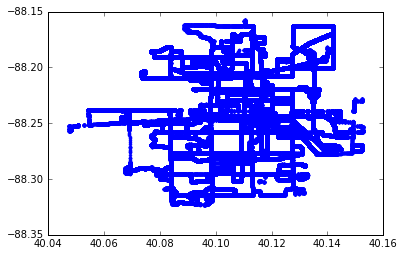

In [13]:
# draw all the shapes / route of the cumtd
plt.plot(shapes['shape_pt_lat'],shapes['shape_pt_lon'],'.')

In [91]:
# expore trips to group the route
trips
trips.shape_id.unique()
# ok we find a relation between trips and shapes
# explore route
#routes.keys()
#routes.xroute_id.unique()
#trips.route_id.unique()
#trips.keys()
#routes.iterrows()
shapes.keys()
routes.route_color.unique() 
routes[routes['route_color']=='eb008b']
#stop_times

,xroute_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
1,RUBY SATURDAY,CUMTD,110,Ruby Saturday,NaN,3,NaN,eb008b,000000
26,RUBY SUNDAY,CUMTD,110,Ruby Sunday,NaN,3,NaN,eb008b,000000
41,RUBY EVENING SATURDAY,CUMTD,110,Ruby Evening Saturday,NaN,3,NaN,eb008b,000000
44,RUBY,CUMTD,11,Ruby,NaN,3,NaN,eb008b,000000
81,RUBY EVENING,CUMTD,110,Ruby Evening,NaN,3,NaN,eb008b,000000


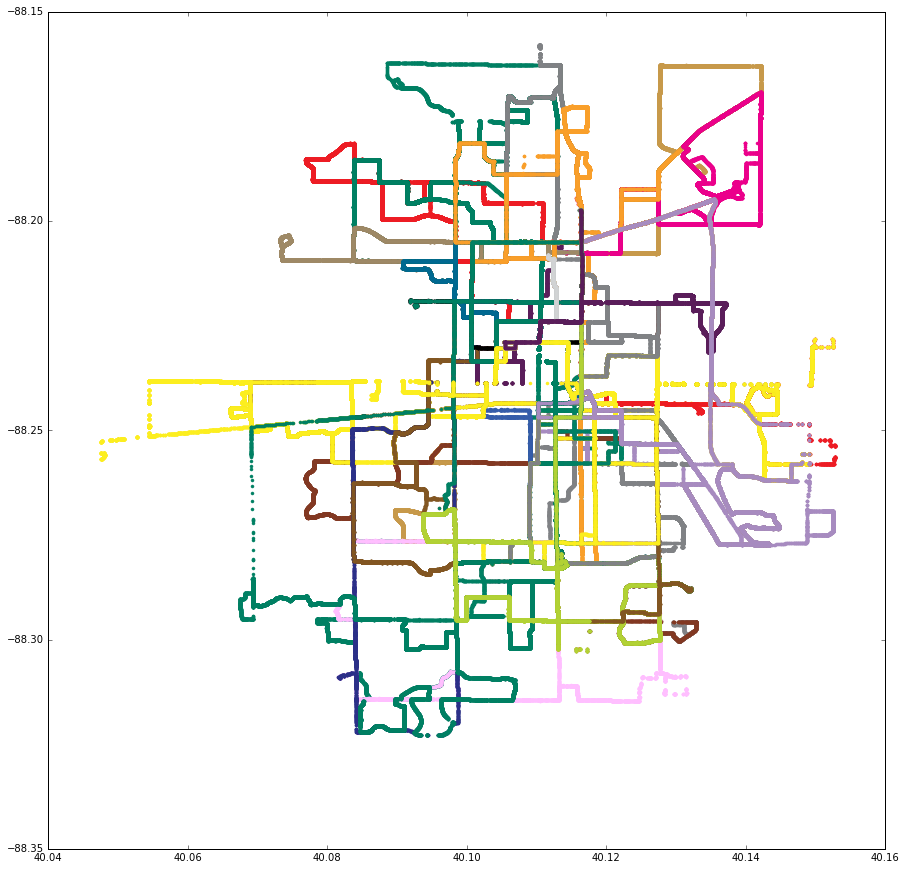

In [74]:
sample_fig = plt.figure(figsize=(15,15));
ax = plt.subplot();
for route_idx,route in routes.iterrows():
    obs_color = route['route_color']
#    log.debug(obs_color)
    obs_rgb=Color('#'+obs_color)
#    print(obs_rgb)
    obs_trips = trips[trips['route_id']==route['xroute_id']]    
#    for trip_idx,obs_trip in obs_trips.iterrows():
    for obs_shape_id in obs_trips.shape_id.unique():                    
        obs_shape = shapes[shapes['shape_id']==obs_shape_id]
        ax.plot(obs_shape['shape_pt_lat'],obs_shape['shape_pt_lon'],'.',color=obs_rgb.hex)

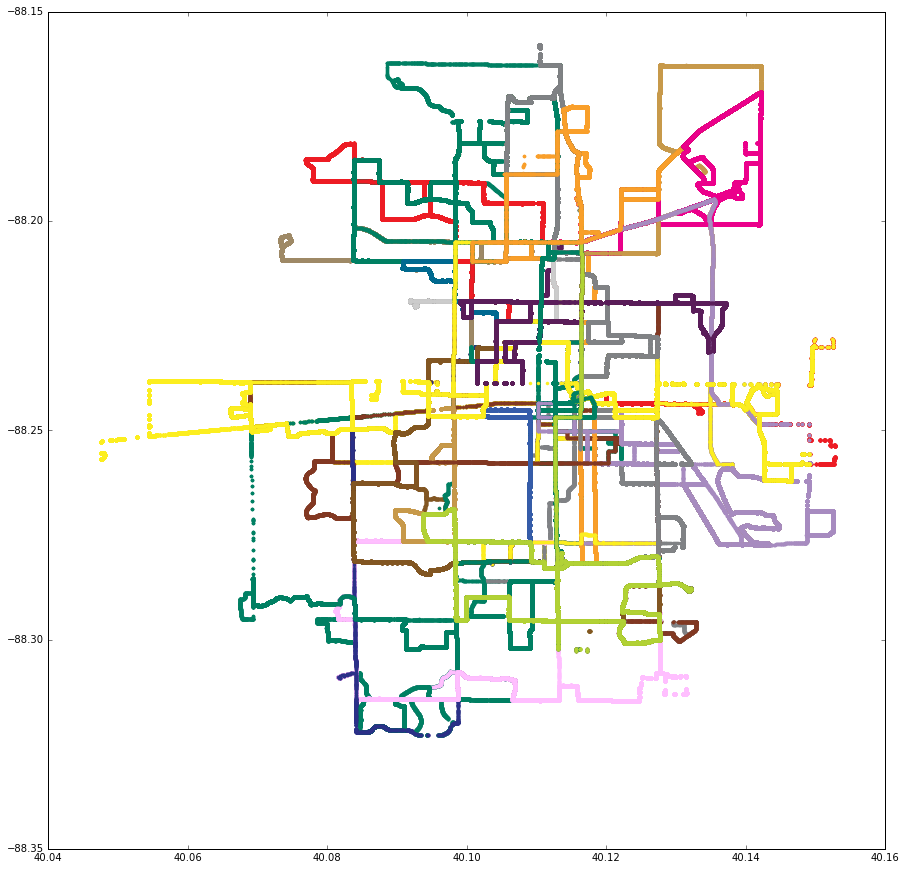

In [102]:
def draw_plot(routes,trips):
    sample_fig = plt.figure(figsize=(15,15));
    ax = plt.subplot();
    for trip_idx,obs_trips in trips.iterrows():
        obs_color = routes[routes['xroute_id']==obs_trips['route_id']]['route_color'].values[0]
    #    log.debug(obs_color)
    #    print(obs_color)
        obs_rgb=Color('#'+obs_color)
        obs_shape = shapes[shapes['shape_id']==obs_trips.shape_id]
        ax.plot(obs_shape['shape_pt_lat'],obs_shape['shape_pt_lon'],'.',color=obs_rgb.hex)
            
draw_plot(routes,trips)

In [155]:
# Most frequent route

# filter our observation stoptime which has departure_time > 08:00 and arrival_time <17:00
#datetime.datetime.strptime(, "H:%M:%S")
x = datetime.datetime.strptime('00:00:00,000'.split(',')[0],'%H:%M:%S')
for stopidx,stopval in stop_times.iterrows():
    #print(arr_val[0:2])
    arr_val = stopval['arrival_time']
    dep_val = stopval['departure_time']
    if(int(arr_val[0:2])>=24):
        arr_val='{0:02d}'.format(int(arr_val[0:2])-24)+arr_val[2:len(arr_val)]        
    if(int(dep_val[0:2])>=24):
        dep_val='{0:02d}'.format(int(dep_val[0:2])-24)+dep_val[2:len(dep_val)]        
    x = time.strptime(arr_val, "%H:%M:%S")
    stopval['arrival_time_ms'] = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
    x = time.strptime(dep_val, "%H:%M:%S")
    stopval['departure_time_ms'] = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()

#stop_times['arrival_time_ms'] = stop_times['arrival_time']

In [168]:
# convert arrival and departure time into millisecond
def convertToSecond(col):
    arr_val = col
    if(int(arr_val[0:2])>=24):
        arr_val='{0:02d}'.format(int(arr_val[0:2])-24)+arr_val[2:len(arr_val)]
    x = time.strptime(arr_val, "%H:%M:%S")
    second = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
    return second

stop_times['arrival_time_ms'] = stop_times['arrival_time']\
    .apply(lambda col: convertToSecond(col))    
stop_times['departure_time_ms'] = stop_times['departure_time']\
    .apply(lambda col: convertToSecond(col))


In [198]:
# filter from stop_time arrival time that has 08:00 until 17:00 value
low_time = convertToSecond('08:00:00')
high_time = convertToSecond('17:00:00')
stop_mask = (stop_times['arrival_time_ms']>=low_time) & (stop_times['arrival_time_ms']<=high_time)
stop_obs = stop_times[stop_mask]


In [210]:
# filter trip_id based on the stop_obs and collect the frequency based on route
def filterTripsById(trips,trip_id):
    return(trips[trips['trip_id'].isin(trip_id)])

trips_obs = filterTripsById(trips,stop_obs['trip_id'].unique())
#trips_obs = stop_obs['trip_id'].unique().map(lambda x:filterTripsById(trips,x))

In [ ]:
sample_fig.suptitle('Transform Images {} using others Principal
Component'.format(metadata['label_names'][x]))                                   
fig = plt.figure(figsize=(10,6));
ax = plt.subplot();
ax.set_title("Principal Coordinate Analysis using Distances")
p = ax.plot(Vt[0,],Vt[1,],'o')